In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# data directory
DATA_DIR = os.path.join('C:', 'data\processed')

In [3]:
DATA_DIR

'C:data\\processed'

In [4]:
data_paths = {'A': {'train': os.path.join(DATA_DIR, 'A', 'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'A', 'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'B', 'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B', 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'C', 'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C', 'C_hhold_test.csv')}}

In [5]:
# load training data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

In [6]:
a_train.shape

(8203, 345)

In [7]:
data_paths

{'A': {'test': 'C:data\\processed\\A\\A_hhold_test.csv',
  'train': 'C:data\\processed\\A\\A_hhold_train.csv'},
 'B': {'test': 'C:data\\processed\\B\\B_hhold_test.csv',
  'train': 'C:data\\processed\\B\\B_hhold_train.csv'},
 'C': {'test': 'C:data\\processed\\C\\C_hhold_test.csv',
  'train': 'C:data\\processed\\C\\C_hhold_train.csv'}}

In [8]:
a_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [9]:
a_train.columns

Index(['wBXbHZmp', 'SlDKnCuu', 'KAJOWiiw', 'DsKacCdL', 'rtPrBBPl', 'tMJrvvut',
       'jdetlNNF', 'maLAYXwi', 'vwpsXRGk', 'sArDRIyX',
       ...
       'sDGibZrP', 'CsGvKKBJ', 'OLpGAaEu', 'LrDrWRjC', 'JCDeZBXq', 'HGPWuGlV',
       'GDUPaBQs', 'WuwrCsIY', 'AlDbXTlZ', 'country'],
      dtype='object', length=345)

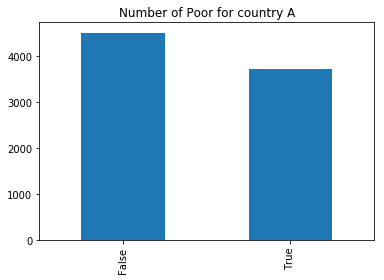

In [12]:
a_train.poor.value_counts().plot.bar(title='Number of Poor for country A')

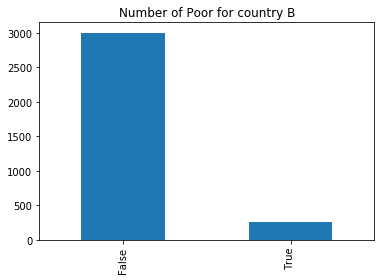

In [13]:
b_train.poor.value_counts().plot.bar(title='Number of Poor for country B')

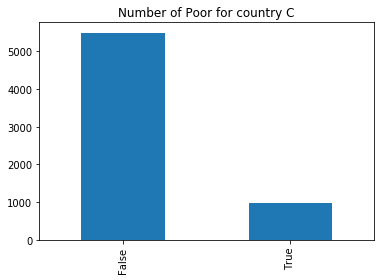

In [14]:
c_train.poor.value_counts().plot.bar(title='Number of Poor for country C')

In [15]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.6+ MB


In [16]:
b_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB


In [17]:
c_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB


In [18]:
# Standardize features
def standardize(df, numeric_only=True):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return df
    

def pre_process_data(df, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
        

    df = standardize(df)
    print("After standardization {}".format(df.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(df)
    print("After converting categoricals:\t{}".format(df.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    df.fillna(0, inplace=True)
    
    return df

In [19]:
print("Country A")
aX_train = pre_process_data(a_train.drop('poor', axis=1))
ay_train = np.ravel(a_train.poor)

print("\nCountry B")
bX_train = pre_process_data(b_train.drop('poor', axis=1))
by_train = np.ravel(b_train.poor)

print("\nCountry C")
cX_train = pre_process_data(c_train.drop('poor', axis=1))
cy_train = np.ravel(c_train.poor)

Country A
Input shape:	(8203, 344)
After standardization (8203, 344)
After converting categoricals:	(8203, 859)

Country B
Input shape:	(3255, 441)
After standardization (3255, 441)
After converting categoricals:	(3255, 1432)

Country C
Input shape:	(6469, 163)
After standardization (6469, 163)
After converting categoricals:	(6469, 795)


In [20]:
aX_train.shape

(8203, 859)

In [21]:
a_train.columns

Index(['wBXbHZmp', 'SlDKnCuu', 'KAJOWiiw', 'DsKacCdL', 'rtPrBBPl', 'tMJrvvut',
       'jdetlNNF', 'maLAYXwi', 'vwpsXRGk', 'sArDRIyX',
       ...
       'sDGibZrP', 'CsGvKKBJ', 'OLpGAaEu', 'LrDrWRjC', 'JCDeZBXq', 'HGPWuGlV',
       'GDUPaBQs', 'WuwrCsIY', 'AlDbXTlZ', 'country'],
      dtype='object', length=345)

In [22]:
ay_train.data

In [23]:
from sklearn.ensemble import RandomForestClassifier

def train_model(features, labels, **kwargs):
    
    # instantiate model
    model = RandomForestClassifier(n_estimators=50, random_state=0)
    
    # train model
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print(f"In-sample accuracy: {accuracy:0.2%}")
    
    return model

In [24]:
model_a = train_model(aX_train, ay_train)

In-sample accuracy: 100.00%


In [84]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import metrics

array([False, False,  True, ...,  True,  True, False], dtype=bool)

In [26]:
model_b = train_model(bX_train, by_train)

In-sample accuracy: 99.94%


In [27]:
model_c = train_model(cX_train, cy_train)

In-sample accuracy: 100.00%


In [28]:
a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

In [29]:
a_test = pre_process_data(a_test, enforce_cols=aX_train.columns)
b_test = pre_process_data(b_test, enforce_cols=bX_train.columns)
c_test = pre_process_data(c_test, enforce_cols=cX_train.columns)

Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 851)
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)
Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 773)


In [30]:
a_preds = model_a.predict_proba(a_test)
b_preds = model_b.predict_proba(b_test)
c_preds = model_c.predict_proba(c_test)

In [31]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [32]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')
b_sub = make_country_sub(b_preds, b_test, 'B')
c_sub = make_country_sub(c_preds, c_test, 'C')

In [147]:
a_preds

array([[ 0.68,  0.32],
       [ 0.72,  0.28],
       [ 0.74,  0.26],
       ..., 
       [ 0.66,  0.34],
       [ 0.68,  0.32],
       [ 0.76,  0.24]])

In [33]:
submission = pd.concat([a_sub, b_sub, c_sub])

In [35]:
submission.shape

(8832, 2)

In [37]:
submission.to_csv('submission.csv')

In [38]:
data_paths_ind = {'A': {'train': os.path.join(DATA_DIR, 'A', 'A_indiv_train.csv'), 
                        'test':  os.path.join(DATA_DIR, 'A', 'A_indiv_test.csv')}, 
              
                  'B': {'train': os.path.join(DATA_DIR, 'B', 'B_indiv_train.csv'), 
                        'test':  os.path.join(DATA_DIR, 'B', 'B_indiv_test.csv')}, 
              
                  'C': {'train': os.path.join(DATA_DIR, 'C', 'C_indiv_train.csv'), 
                        'test':  os.path.join(DATA_DIR, 'C', 'C_indiv_test.csv')}}

In [39]:
# load training data
a_indiv_train = pd.read_csv(data_paths_ind['A']['train'], index_col=['id','iid'])
b_indiv_train = pd.read_csv(data_paths_ind['B']['train'], index_col=['id','iid'])
c_indiv_train = pd.read_csv(data_paths_ind['C']['train'], index_col=['id','iid'])

In [40]:
a_indiv_train.shape

(37560, 42)

In [41]:
a_train.shape

(8203, 345)

In [42]:
print("Country A")
aX_indiv_train = pre_process_data(a_indiv_train.drop('poor', axis=1))
ay_indiv_train = np.ravel(a_indiv_train.poor)

print("\nCountry B")
bX_indiv_train = pre_process_data(b_indiv_train.drop('poor', axis=1))
by_indiv_train = np.ravel(b_indiv_train.poor)

print("\nCountry C")
cX_indiv_train = pre_process_data(c_indiv_train.drop('poor', axis=1))
cy_indiv_train = np.ravel(c_indiv_train.poor)

Country A
Input shape:	(37560, 41)
After standardization (37560, 41)
After converting categoricals:	(37560, 274)

Country B
Input shape:	(20252, 224)
After standardization (20252, 224)
After converting categoricals:	(20252, 1641)

Country C
Input shape:	(29913, 41)
After standardization (29913, 41)
After converting categoricals:	(29913, 300)


In [45]:
aX_indiv_train_group = aX_indiv_train.groupby(['id']).sum()
bX_indiv_train_group = bX_indiv_train.groupby(['id']).sum()
cX_indiv_train_group = cX_indiv_train.groupby(['id']).sum()

In [51]:
aX_train_merge = aX_train.merge(aX_indiv_train_group, how='outer', left_index=True, right_index=True)

In [52]:
aX_train_merge.shape

(8203, 1133)

In [53]:
bX_train_merge = bX_train.merge(bX_indiv_train_group, how='outer', left_index=True, right_index=True)
cX_train_merge = cX_train.merge(cX_indiv_train_group, how='outer', left_index=True, right_index=True)

In [54]:
model_a_merge = train_model(aX_train_merge, ay_train)

In-sample accuracy: 100.00%


In [55]:
model_b_merge = train_model(bX_train_merge, by_train)

In-sample accuracy: 99.88%


In [56]:
model_c_merge = train_model(cX_train_merge, cy_train)

In-sample accuracy: 99.92%


In [57]:
a_indiv_test = pd.read_csv(data_paths_ind['A']['test'], index_col=['id','iid'])
b_indiv_test = pd.read_csv(data_paths_ind['B']['test'], index_col=['id','iid'])
c_indiv_test = pd.read_csv(data_paths_ind['C']['test'], index_col=['id','iid'])

In [58]:
a_indiv_test = pre_process_data(a_indiv_test, enforce_cols=aX_indiv_train.columns)
b_indiv_test = pre_process_data(b_indiv_test, enforce_cols=bX_indiv_train.columns)
c_indiv_test = pre_process_data(c_indiv_test, enforce_cols=cX_indiv_train.columns)

Input shape:	(18535, 41)
After standardization (18535, 41)
After converting categoricals:	(18535, 273)
Input shape:	(10066, 224)
After standardization (10066, 224)
After converting categoricals:	(10066, 1534)
Input shape:	(14701, 41)
After standardization (14701, 41)
After converting categoricals:	(14701, 301)


In [59]:
a_indiv_test_group = a_indiv_test.groupby(['id']).sum()
b_indiv_test_group = b_indiv_test.groupby(['id']).sum()
c_indiv_test_group = c_indiv_test.groupby(['id']).sum()

In [60]:
a_test_merge = a_test.merge(a_indiv_test_group, how='outer', left_index=True, right_index=True)
b_test_merge = b_test.merge(b_indiv_test_group, how='outer', left_index=True, right_index=True)
c_test_merge = c_test.merge(c_indiv_test_group, how='outer', left_index=True, right_index=True)

In [61]:
a_merge_preds = model_a_merge.predict_proba(a_test_merge)
b_merge_preds = model_b_merge.predict_proba(b_test_merge)
c_merge_preds = model_c_merge.predict_proba(c_test_merge)

In [62]:
# convert preds to data frames
a_merge_sub = make_country_sub(a_merge_preds, a_test_merge, 'A')
b_merge_sub = make_country_sub(b_merge_preds, b_test_merge, 'B')
c_merge_sub = make_country_sub(c_merge_preds, c_test_merge, 'C')

In [63]:
submission_merge = pd.concat([a_merge_sub, b_merge_sub, c_merge_sub])

In [64]:
submission_merge.head()

,country,poor
id,,
8,A,0.60
65,A,0.58
71,A,0.54
80,A,0.64
167,A,0.56


In [66]:
submission_merge.to_csv('submission_merge.csv')

In [69]:
tt = pd.concat([submission, submission_merge], axis=1)

In [71]:
submission.dtypes

country     object
poor       float64
dtype: object

In [72]:
temp = submission_merge.reset_index(drop=True)

In [73]:
temp.dtypes

country     object
poor       float64
dtype: object

In [74]:
submission_merge.to_csv('submission_merge.csv')

In [75]:
submission.rename(columns={'country':'country_x', 'poor':'poor_x'}, inplace=True)

In [76]:
submission_merge.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)

In [77]:
temp = submission.join(submission_merge, sort=False)

In [78]:
temp.drop(['country_y', 'poor_x'], axis=1, inplace=True)
temp.rename(columns={'country_x':'country', 'poor_y':'poor'}, inplace=True)

In [80]:
temp.to_csv('submission_rev.csv')

In [90]:
aX_train.shape

(8203, 859)

In [96]:
ay_train

array([False, False,  True, ...,  True,  True, False], dtype=bool)

In [99]:
aX_train_sp, aX_test_sp, ay_train_sp, ay_test_sp = train_test_split(aX_train, ay_train, test_size=0.4, random_state=0)

In [158]:
bX_train_sp, bX_test_sp, by_train_sp, by_test_sp = train_test_split(bX_train, by_train, test_size=0.4, random_state=0)

In [159]:
cX_train_sp, cX_test_sp, cy_train_sp, cy_test_sp = train_test_split(cX_train, cy_train, test_size=0.4, random_state=0)

In [105]:
clf = svm.SVC(kernel='linear', C=1).fit(aX_train_sp, ay_train_sp)

In [106]:
clf.score(aX_test_sp, ay_test_sp)

0.85953686776355875

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
clf = svm.SVC(kernel='linear', C=1)

In [109]:
scores = cross_val_score(clf, aX_train, ay_train, cv=5)

In [110]:
scores

array([ 0.86288848,  0.8702011 ,  0.8622791 ,  0.875     ,  0.85365854])

In [111]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.01)


In [112]:
from sklearn import metrics

In [200]:
scores = cross_val_score(clf, aX_train, ay_train, cv=5, scoring='f1_macro')

In [201]:
scores

array([ 0.86119536,  0.86772332,  0.8607961 ,  0.87521697,  0.85878498])

In [202]:
clf = svm.SVC(C=1).fit(aX_train, ay_train)

In [203]:
clf.score(aX_test_sp, ay_test_sp)  

0.86898232784887264

In [206]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8647 (+/- 0.0121)


In [207]:
cross_val_predict(clf, aX_train, ay_train, cv=cv)

array([False, False, False, ...,  True, False, False], dtype=bool)

In [208]:
ay_train

array([False, False,  True, ...,  True,  True, False], dtype=bool)

In [209]:
clf.predict(a_test)

array([False, False, False, ..., False, False, False], dtype=bool)

In [212]:
clf.decision_function(a_test)

array([-3.33639911, -4.71494669, -2.37225247, ..., -2.44561318,
       -4.89208596, -2.95085588])

In [213]:
clf.predict(a_test)

array([False, False, False, ..., False, False, False], dtype=bool)

In [118]:
from sklearn.pipeline import make_pipeline

In [122]:
from sklearn.model_selection import cross_val_predict

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import (StratifiedKFold, cross_val_score,
                                      train_test_split)

C:\Users\AMAMUN\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [150]:
# setup model
a_cv = StratifiedKFold(ay_train, 10)
logreg = LogisticRegression()

In [155]:
b_cv = StratifiedKFold(by_train, 10)
logreg = LogisticRegression()

In [156]:
c_cv = StratifiedKFold(cy_train, 10)
logreg = LogisticRegression()

In [166]:
logreg.fit(aX_train, ay_train)
a_prob = logreg.predict_proba(a_test)

In [165]:
logreg.fit(bX_train, by_train)
b_prob = logreg.predict_proba(b_test)

In [167]:
logreg.fit(cX_train, cy_train)
c_prob = logreg.predict_proba(c_test)

In [152]:
logreg.fit(aX_train, ay_train)
proba = logreg.predict_proba(a_test)

In [171]:
a_sub=make_country_sub(a_prob, a_test, 'A')

In [172]:
b_sub= make_country_sub(b_prob, b_test, 'A')
c_sub = make_country_sub(c_prob, c_test, 'A')

In [173]:
submission3 = pd.concat([a_sub, b_sub, c_sub])

In [174]:
submission3.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)

In [175]:
s3 = submission.join(submission3, sort=False)
s3.drop(['country_y', 'poor_x'], axis=1, inplace=True)
s3.rename(columns={'country_x':'country', 'poor_y':'poor'}, inplace=True)

In [176]:
s3.to_csv('submission3.csv')

In [135]:
class proba_logreg(LogisticRegression):
    def predict(self, X):
        return LogisticRegression.predict_proba(self, X)

In [180]:
# cross validation probabilities
probas = cross_val_predict(proba_logreg(), aX_train, ay_train, cv=cv)

In [182]:
len(a_test)

4041

In [178]:
a_prob

array([[  9.99999869e-01,   1.31008092e-07],
       [  1.00000000e+00,   2.16644216e-11],
       [  9.99997821e-01,   2.17903578e-06],
       ..., 
       [  9.99993372e-01,   6.62843181e-06],
       [  1.00000000e+00,   2.01599311e-10],
       [  9.99999175e-01,   8.25231301e-07]])

In [183]:
# setup model
a_cv = StratifiedKFold(ay_train_sp, 10)
logreg = LogisticRegression()

In [185]:
b_cv = StratifiedKFold(by_train_sp, 10)
logreg = LogisticRegression()

In [186]:
c_cv = StratifiedKFold(cy_train_sp, 10)
logreg = LogisticRegression()

In [187]:
logreg.fit(aX_train_sp, ay_train_sp)
a_prob = logreg.predict_proba(a_test)

In [193]:
logreg.fit(bX_train_sp, by_train_sp)
b_prob = logreg.predict_proba(b_test)

In [194]:
logreg.fit(cX_train_sp, cy_train_sp)
c_prob = logreg.predict_proba(c_test)

In [189]:
a_prob

array([[  9.99985428e-01,   1.45715613e-05],
       [  9.99999966e-01,   3.35472104e-08],
       [  9.96428319e-01,   3.57168130e-03],
       ..., 
       [  9.97636857e-01,   2.36314289e-03],
       [  9.99999645e-01,   3.54649383e-07],
       [  9.97663609e-01,   2.33639130e-03]])

In [190]:
a_sub=make_country_sub(a_prob, a_test, 'A')

In [195]:
b_sub= make_country_sub(b_prob, b_test, 'A')
c_sub = make_country_sub(c_prob, c_test, 'A')

In [197]:
submission4 = pd.concat([a_sub, b_sub, c_sub])
submission4.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s4 = submission.join(submission4, sort=False)
s4.drop(['country_y', 'poor_x'], axis=1, inplace=True)
s4.rename(columns={'country_x':'country', 'poor_y':'poor'}, inplace=True)

In [198]:
s4.to_csv('submission4.csv')

In [1]:
from xgboost import XGBClassifier

C:\Users\AMAMUN\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from catboost import CatBoostRegressor